# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

Test/Validation split

In [19]:
# Load pickled data
import pickle
import numpy as np

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
# TODO: Number of training examples
n_train = X_train.shape[0]
print(X_train.shape)
# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1], X_train.shape[2]]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate((y_train, y_valid, y_valid), axis=0)))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

(34799, 32, 32, 3)
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

39


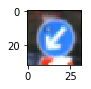

In [20]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

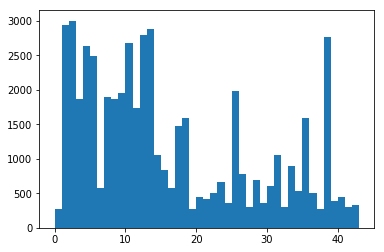

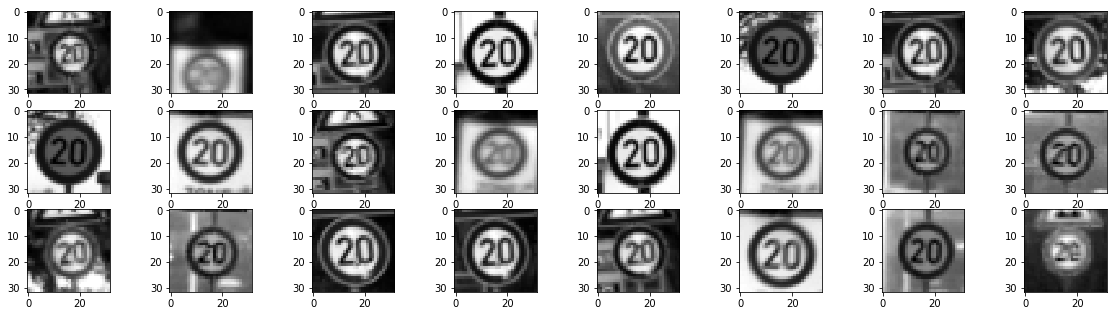

In [21]:
import cv2
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

    
def normalize(image):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.01
    b = 0.99
    RGB_min = 0
    RGB_max = 255
    return a + ( ( (image - RGB_min)*(b - a) )/( RGB_max - RGB_min ) )

def grayscaling(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

n, bins, patches = plt.hist(np.concatenate((y_train, y_valid, y_test), axis=0), range(0,44))

X_train_gray = np.zeros(shape=(n_train,32, 32))
X_valid_gray = np.zeros(shape=(n_validation,32, 32))
X_test_gray = np.zeros(shape=(n_test,32, 32))
for i in range(0,n_train):
   X_train_gray[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)
for i in range(0,n_validation):
   X_valid_gray[i] = cv2.cvtColor(X_valid[i], cv2.COLOR_BGR2GRAY)
for i in range(0,n_test):
   X_test_gray[i] = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2GRAY)
                            

categoryimages = []
indices = np.where(y_train == np.argmin(n))[0]
for i in np.random.choice(indices, 24, replace=False):
    categoryimages.append(X_train_gray[i])


plt.figure(figsize=(20, 7))
columns = 8
for i, categoryimage in enumerate(categoryimages):
    plt.subplot(len(categoryimages) / columns + 1, columns, i + 1)
    plt.imshow(categoryimage, cmap='gray')


In [74]:
X_train[:,:,:,0] = X_train_gray
X_train[:,:,:,1] = X_train_gray
X_train[:,:,:,2] = X_train_gray

X_valid[:,:,:,0] = X_valid_gray
X_valid[:,:,:,1] = X_valid_gray
X_valid[:,:,:,2] = X_valid_gray

X_test[:,:,:,0]  = X_test_gray
X_test[:,:,:,1]  = X_test_gray
X_test[:,:,:,2]  = X_test_gray


print(X_train.shape)

(34799, 32, 32, 3)


In [22]:
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test  = normalize(X_test)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [23]:
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 128
dropout =  0.75

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [38]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3 Output =28x28x9
    conv1_W = tf.Variable(tf.truncated_normal(shape=(6, 6, 3, 9), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(9))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print(conv1.get_shape())
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x9 Output = 14x14x9
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(conv1.get_shape())
    # SOLUTION: Layer 2: Convolutional. Output = 14x14x9.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(6, 6, 9, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    print(conv2.get_shape())
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x24. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(conv2.get_shape())
    # SOLUTION: Flatten. Input = 5x5x24. Output = 600.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 600. Output = 180.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(384, 180), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(180))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
  #  fc1    = tf.nn.dropout(fc1, dropout)

    # SOLUTION: Layer 4: Fully Connected. Input = 180. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(180, 104), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(104))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2 = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 104. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(104, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [40]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [41]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

(?, 27, 27, 9)
(?, 13, 13, 9)
(?, 8, 8, 24)
(?, 4, 4, 24)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [42]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [43]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.812

EPOCH 1 ...
Train Accuracy = 0.879

EPOCH 2 ...
Validation Accuracy = 0.870

EPOCH 2 ...
Train Accuracy = 0.938

EPOCH 3 ...
Validation Accuracy = 0.883

EPOCH 3 ...
Train Accuracy = 0.966

EPOCH 4 ...
Validation Accuracy = 0.904

EPOCH 4 ...
Train Accuracy = 0.969

EPOCH 5 ...
Validation Accuracy = 0.915

EPOCH 5 ...
Train Accuracy = 0.985

EPOCH 6 ...
Validation Accuracy = 0.903

EPOCH 6 ...
Train Accuracy = 0.983

EPOCH 7 ...
Validation Accuracy = 0.918

EPOCH 7 ...
Train Accuracy = 0.990

EPOCH 8 ...
Validation Accuracy = 0.908

EPOCH 8 ...
Train Accuracy = 0.992

EPOCH 9 ...
Validation Accuracy = 0.926

EPOCH 9 ...
Train Accuracy = 0.995

EPOCH 10 ...
Validation Accuracy = 0.912

EPOCH 10 ...
Train Accuracy = 0.995

EPOCH 11 ...
Validation Accuracy = 0.925

EPOCH 11 ...
Train Accuracy = 0.991

EPOCH 12 ...
Validation Accuracy = 0.925

EPOCH 12 ...
Train Accuracy = 0.995

EPOCH 13 ...
Validation Accuracy = 0.933

EPOCH 13 ...
Tr

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [44]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.946
